### Unsupervised Machine Learning 
##### Rick Gosalvez, Spring 2020

# Fall Detection of the Elderly

#### Dataset (source: https://www.kaggle.com/pitasr/falldata)

Fall detection data set of Chinese hospitals of old age patients.

0- Standing 1- Walking 2- Sitting 3- Falling 4- Cramps 5- Running

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

### Import Data

In [2]:
df = pd.read_csv('falldeteciton.csv', engine='python', sep=',', header=0)
pd.set_option('precision', 2)  # format for floating-point values

In [3]:
df.shape

(16382, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [5]:
list(df.columns.values)

['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

In [6]:
# df.sort_values(by=['ACTIVITY'], inplace=True)
# df.head()

In [7]:
df

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809
...,...,...,...,...,...,...,...
16377,4,9280.68,11417.00,-3021.64,36,156,654
16378,3,8479.69,9455.54,-2932.85,17,138,554
16379,2,8872.53,27449.90,-2870.00,33,156,1364
16380,4,7738.99,26466.40,-2920.24,97,156,1521


In [8]:
df_two = pd.read_csv('falldeteciton.csv', engine='python', sep=',', header=0)
pd.set_option('precision', 2)  # format for floating-point values
# df_two.sort_values(by=['ACTIVITY'], inplace=True)
# df_two.head()

In [9]:
names = ['Standing', 'Walking', 'Sitting', 'Falling', 'Cramps', 'Running']

df_two['ACTIVITYNAME'] = [names[i] for i in df['ACTIVITY']]

df_two

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,ACTIVITYNAME
0,3,4722.92,4019.64,-1600.00,13,79,317,Falling
1,2,4059.12,2191.03,-1146.08,20,54,165,Sitting
2,2,4773.56,2787.99,-1263.38,46,67,224,Sitting
3,4,8271.27,9545.98,-2848.93,26,138,554,Cramps
4,4,7102.16,14148.80,-2381.15,85,120,809,Cramps
...,...,...,...,...,...,...,...,...
16377,4,9280.68,11417.00,-3021.64,36,156,654,Cramps
16378,3,8479.69,9455.54,-2932.85,17,138,554,Falling
16379,2,8872.53,27449.90,-2870.00,33,156,1364,Sitting
16380,4,7738.99,26466.40,-2920.24,97,156,1521,Cramps


In [10]:
pd.set_option('precision', 2)
df_two.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.00,16382.00,1.64e+04,1.64e+04,16382.00,16382.00,16382.00
mean,2.36,10936.84,7.53e+04,-5.62e+03,58.25,211.54,2894.34
std,1.74,5261.46,1.28e+05,1.08e+05,48.29,129.95,3825.93
min,0.00,1954.23,4.22e+01,-1.26e+07,0.00,33.00,5.00
25%,0.00,7263.69,9.94e+03,-5.63e+03,25.00,119.00,587.00
50%,3.00,9769.35,3.12e+04,-3.36e+03,44.00,180.00,1581.00
75%,4.00,13481.65,8.08e+04,-2.15e+03,78.00,271.00,3539.00
max,5.00,50895.50,2.43e+06,1.41e+06,533.00,986.00,52210.00


In [11]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 8 columns):
ACTIVITY        16382 non-null int64
TIME            16382 non-null float64
SL              16382 non-null float64
EEG             16382 non-null float64
BP              16382 non-null int64
HR              16382 non-null int64
CIRCLUATION     16382 non-null int64
ACTIVITYNAME    16382 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 1.0+ MB


In [12]:
df_two['ACTIVITYNAME'].describe()

count        16382
unique           6
top       Standing
freq          4608
Name: ACTIVITYNAME, dtype: object

In [13]:
list(df.columns.values)

['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

In [14]:
list(df_two.columns.values)

['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION', 'ACTIVITYNAME']

In [15]:
df_two

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,ACTIVITYNAME
0,3,4722.92,4019.64,-1600.00,13,79,317,Falling
1,2,4059.12,2191.03,-1146.08,20,54,165,Sitting
2,2,4773.56,2787.99,-1263.38,46,67,224,Sitting
3,4,8271.27,9545.98,-2848.93,26,138,554,Cramps
4,4,7102.16,14148.80,-2381.15,85,120,809,Cramps
...,...,...,...,...,...,...,...,...
16377,4,9280.68,11417.00,-3021.64,36,156,654,Cramps
16378,3,8479.69,9455.54,-2932.85,17,138,554,Falling
16379,2,8872.53,27449.90,-2870.00,33,156,1364,Sitting
16380,4,7738.99,26466.40,-2920.24,97,156,1521,Cramps


In [59]:
df_two.to_csv('labeled_falldeteciton.csv', index=False)

### Visualize the dataset

/Users/gosalvez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/gosalvez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


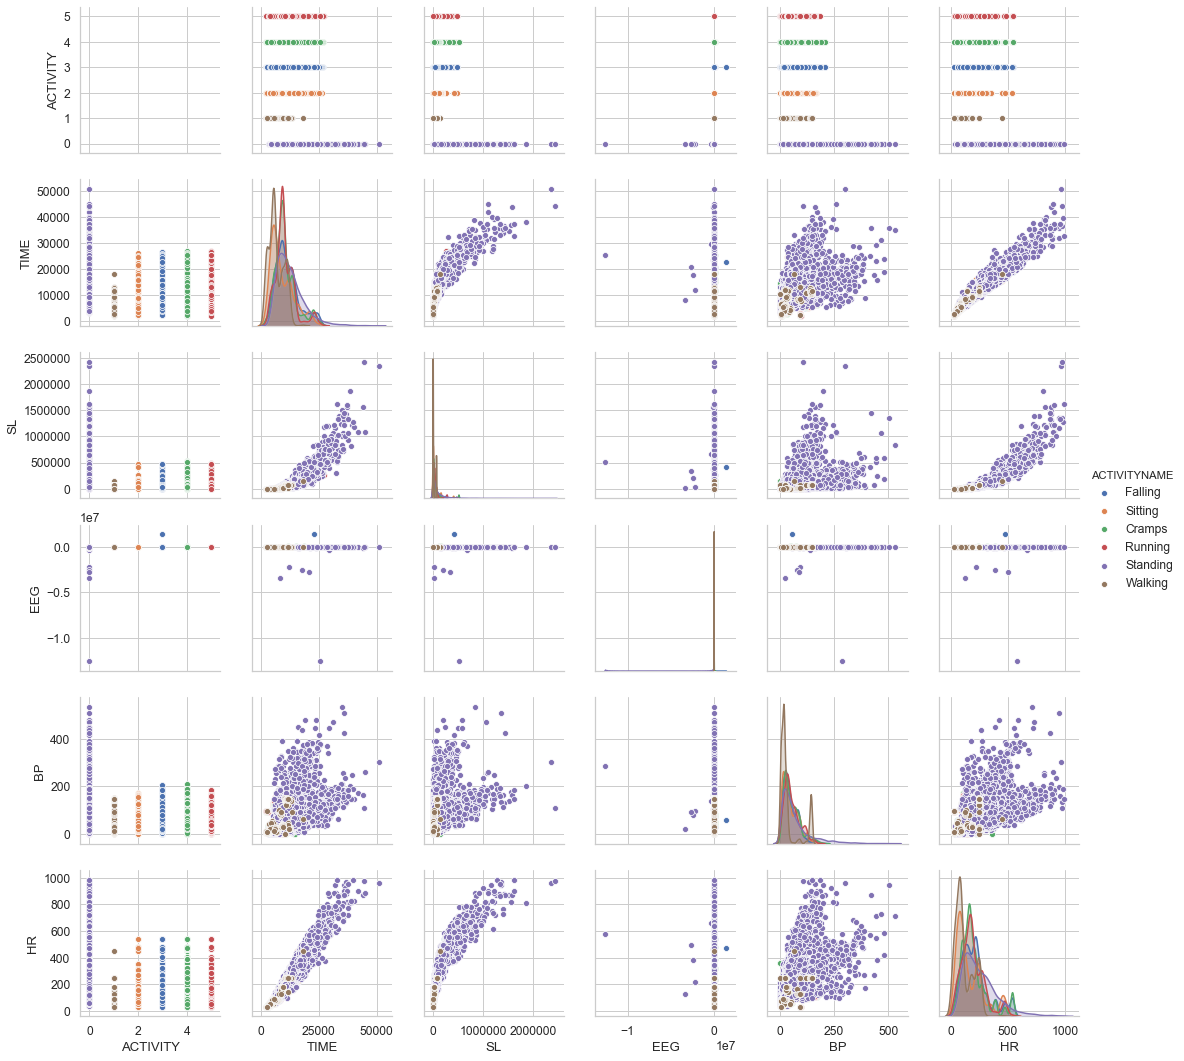

In [16]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=df_two, vars=df.columns[0:6], hue='ACTIVITYNAME')

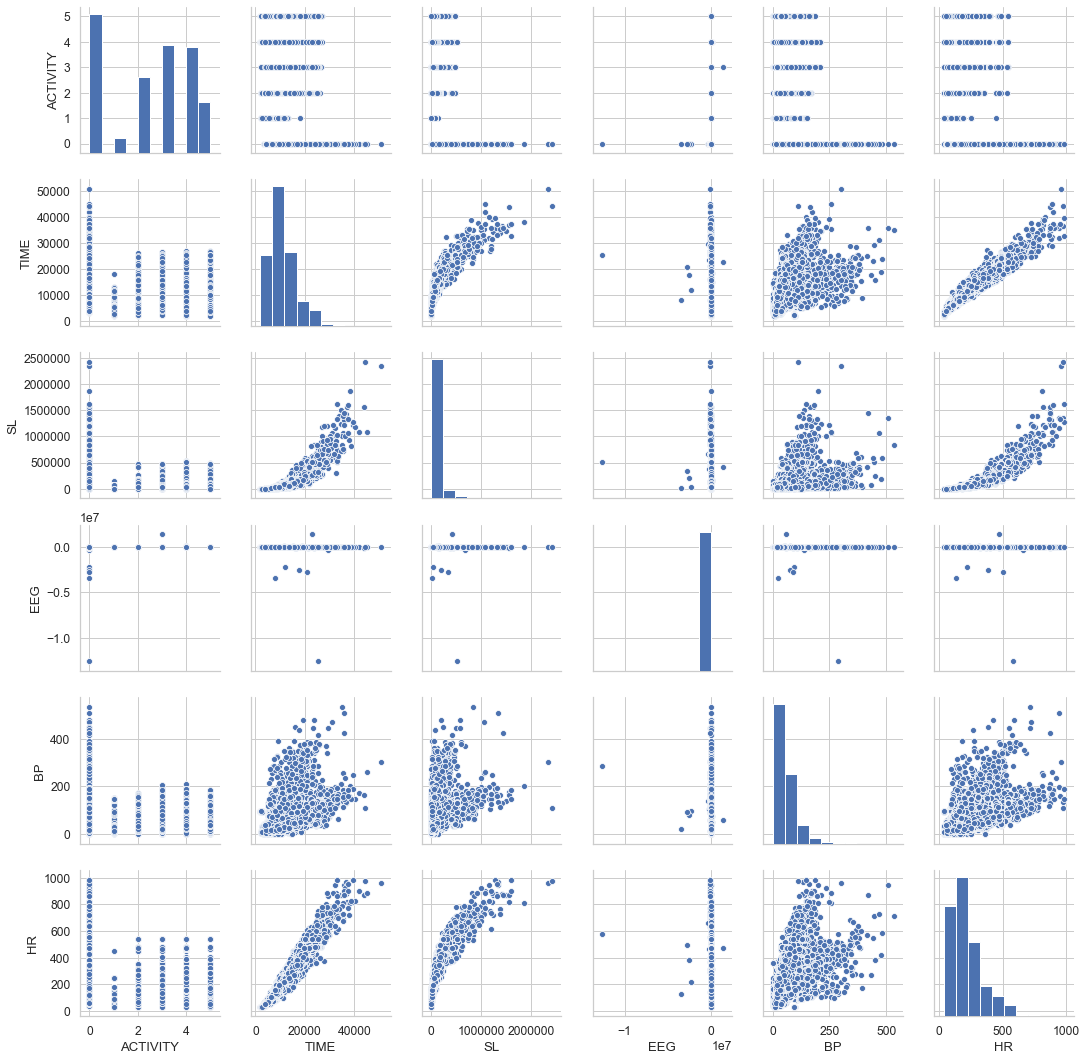

In [17]:
grid = sns.pairplot(data=df_two, vars=df.columns[0:6])

### Create a k-means estimator and fit the model

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Compare the k-means labels to the Iris dataset’s target values

In [68]:
print(kmeans.labels_[0:250])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]


In [69]:
print(kmeans.labels_[250:500])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [70]:
print(kmeans.labels_[500:750])

[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Dimensionality reduction with Principal Component Analysis (PCA)

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)  # reduce to two components
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
reduced_fall = pca.transform(df)
reduced_fall.shape

(16382, 2)

### Visualize the reduced data

In [73]:
reduced_fall_df = pd.DataFrame(reduced_fall, 
                               columns=['Component 1', 'Component 2'])
reduced_fall_df['ACTIVITYNAME'] = df_two.ACTIVITYNAME

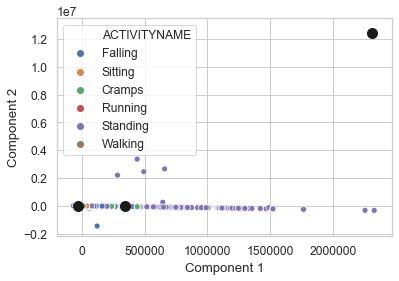

In [74]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=reduced_fall_df, hue='ACTIVITYNAME', legend='brief', 
                       x='Component 1', y='Component 2') 

fall_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(fall_centers[:,0], fall_centers[:,1], s=100, c='k')

In [26]:
print(type(df))
print(type(df_two))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Create a TSNE Estimator to reduce the data to two dimensions

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=11)
reduced_df = tsne.fit_transform(df)

print(f'Reduced data shape: reduced_df.shape = {reduced_df.shape}')

Reduced data shape: reduced_df.shape = (16382, 2)


### Visualize the reduced data

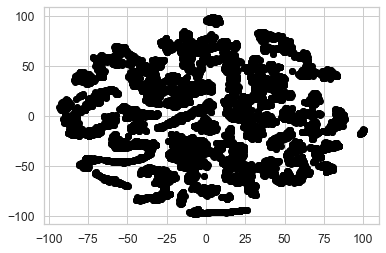

In [28]:
dots = plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c='black')

### Visualize the reduced data with a different color for each digit

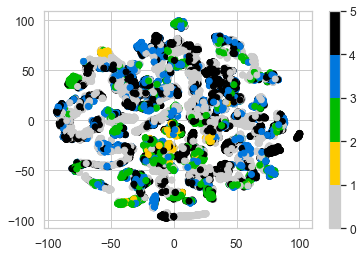

In [29]:
dots = plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=df['ACTIVITY'], 
                   cmap=plt.cm.get_cmap('nipy_spectral_r', 5))

colorbar = plt.colorbar(dots)

In [30]:
print(type(df))
print(type(df_two))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# K-nearest neighbor

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     df, df_two['ACTIVITYNAME'], test_size = 0.25, random_state=0)      # by specifying a number, will always generate the same set of random numbers (important for testing!) Once solid, then can remove seed (aka: number)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (12286, 7)
X_test.shape  = (4096, 7)

y_train.shape = (12286,)
y_test.shape  = (4096,)


In [32]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [33]:
# convert dataframes to numpy arrays
y_train = y_train.to_frame()      # convert from series to numpy
y_test  = y_test.to_frame()       # convert from series to numpy

X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

In [34]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
y_train.shape

(12286, 1)

In [36]:
y_train

array([['Cramps'],
       ['Cramps'],
       ['Falling'],
       ...,
       ['Standing'],
       ['Running'],
       ['Walking']], dtype=object)

In [43]:
y_train = np.ravel(y_train)

In [44]:
y_test = np.ravel(y_test)

### Create and train the k-nearest neighbors model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)         # numer of elements to reference to ID/classify (e.g. dots around a label, slides shows 3 dots, n_neighbor=5 means 5 closest dots around a label)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Test the model by predicting digit classes 

In [57]:
predicted = knn.predict(X=X_test)
expected = y_test

n = 7

print()
print('First twenty predictions:')
print(f'predicted[:{n}] = {predicted[:n]}')
print(f'expected[:{n}]  = {expected[:n]}')
print()


First twenty predictions:
predicted[:7] = ['Falling' 'Standing' 'Falling' 'Cramps' 'Cramps' 'Running' 'Cramps']
expected[:7]  = ['Falling' 'Standing' 'Standing' 'Cramps' 'Cramps' 'Running' 'Falling']



In [47]:
wrong = [ (pred, exp)     # list comprehension that compares both lists by index
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[('Falling', 'Standing'), ('Cramps', 'Falling'), ('Running', 'Cramps'), ('Falling', 'Standing'), ('Cramps', 'Falling'), ('Sitting', 'Falling'), ('Cramps', 'Sitting'), ('Sitting', 'Cramps'), ('Falling', 'Cramps'), ('Cramps', 'Standing'), ('Falling', 'Standing'), ('Sitting', 'Cramps'), ('Standing', 'Cramps'), ('Cramps', 'Running'), ('Sitting', 'Running'), ('Falling', 'Standing'), ('Walking', 'Falling'), ('Running', 'Cramps'), ('Sitting', 'Falling'), ('Cramps', 'Falling'), ('Running', 'Falling'), ('Sitting', 'Cramps'), ('Falling', 'Standing'), ('Cramps', 'Sitting'), ('Sitting', 'Falling'), ('Cramps', 'Sitting'), ('Cramps', 'Sitting'), ('Sitting', 'Falling'), ('Cramps', 'Sitting'), ('Sitting', 'Falling'), ('Falling', 'Sitting'), ('Running', 'Cramps'), ('Falling', 'Sitting'), ('Running', 'Standing'), ('Falling', 'Cramps'), ('Falling', 'Standing'), ('Falling', 'Cramps'), ('Falling', 'Cramps'), ('Falling', 'Sitting'), ('Falling', 'Sitting'), ('Running', 'Cramps'), ('Cramps'

### Model prediction accuracy

In [48]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 64.53%


### Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[597 126  90  34  32   4]
 [215 563  20  98  19   3]
 [139  37 213   7  19   1]
 [ 64 128   4 393  12  18]
 [138 108  44  44 794   5]
 [  7   6   1  28   2  83]]


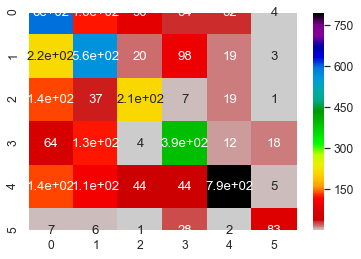

In [50]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(6), columns=range(6))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### Classification report

In [51]:
from sklearn.metrics import classification_report

print(classification_report(expected, predicted, target_names = names))

              precision    recall  f1-score   support

    Standing       0.51      0.68      0.58       883
     Walking       0.58      0.61      0.60       918
     Sitting       0.57      0.51      0.54       416
     Falling       0.65      0.63      0.64       619
      Cramps       0.90      0.70      0.79      1133
     Running       0.73      0.65      0.69       127

    accuracy                           0.65      4096
   macro avg       0.66      0.63      0.64      4096
weighted avg       0.67      0.65      0.65      4096



# Conclusion

Data not enough to accurately predict fall based on conditions. Best K-NNN @ 3 and it is only 65%. Data not good for a model.